In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("./MNIST_data/", one_hot=True)

Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz


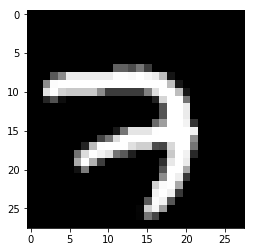

In [2]:
img  = mnist.train.images[0].reshape(28,28)
plt.imshow(img,cmap='gray')

Tensor("Conv2D:0", shape=(1, 14, 14, 5), dtype=float32)


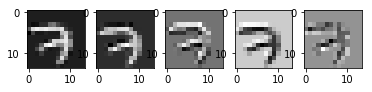

In [3]:
sess = tf.InteractiveSession()

img = img.reshape(-1,28,28,1)
W1 = tf.Variable(tf.random_normal([3,3,1,5],stddev=0.01))

conv2d = tf.nn.conv2d(img,W1,strides=[1,2,2,1],padding='SAME')
print conv2d

sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img,0,3)

for i,one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1)
    plt.imshow(one_img.reshape(14,14),cmap='gray')

Tensor("MaxPool:0", shape=(1, 7, 7, 5), dtype=float32)


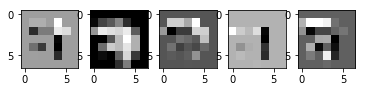

In [4]:
pool = tf.nn.max_pool(conv2d, ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
print pool

sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img,0,3)

for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1)
    plt.imshow(one_img.reshape(7,7),cmap='gray')